### Analyse de la std Q1 23 France BL

In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from os import *
from os.path import *
import numpy as np 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
Data = pd.read_csv(r"Data Mark-It Raw 09.csv")

Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]

max_std = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Month') & (Data['ns1:StartDate'] == '2023-01-01 00:00:00')  ,:]

dates = max_std["ns1:ValuationDate"] 

In [116]:
#data["Start Date"].apply(lambda x : str(x.strftime('%Y-%m-%d')))
dates = pd.to_datetime(dates)
dates

1210    2022-09-01
4943    2022-09-02
8676    2022-09-06
12156   2022-09-07
15889   2022-09-08
19622   2022-09-09
23355   2022-09-12
27088   2022-09-13
30821   2022-09-14
34554   2022-09-15
38287   2022-09-16
42020   2022-09-19
45753   2022-09-20
49486   2022-09-21
53207   2022-09-22
56940   2022-09-23
60668   2022-09-26
Name: ns1:ValuationDate, dtype: datetime64[ns]

In [169]:
#RECUPERATION PRIX TGP SUR LE MOIS DE JANVIER
os.chdir(r'../')
from kdb import *
dates  = dates.astype(str)
df = []

for d in dates:
    data = kdb(date = d, index = "FRANCE_BL")[["Start Date", "Contract type", "TGP", "Markit Std", "Markit"]]
    data = data.loc[(data["Contract type"] == "Month") &  (data["Start Date"] == "2023-01-01"), : ]
    df.append(data)

data = pd.concat(df)


Data retrieved from kdb for 2022-09-01
Data retrieved from kdb for 2022-09-02
Data retrieved from kdb for 2022-09-06
Data retrieved from kdb for 2022-09-07
Data retrieved from kdb for 2022-09-08
Data retrieved from kdb for 2022-09-09
Data retrieved from kdb for 2022-09-12
Data retrieved from kdb for 2022-09-13
Data retrieved from kdb for 2022-09-14
Data retrieved from kdb for 2022-09-15
Data retrieved from kdb for 2022-09-16
Data retrieved from kdb for 2022-09-19
Data retrieved from kdb for 2022-09-20
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-23
Data retrieved from kdb for 2022-09-26


In [170]:
data["Markit Delta"] = abs(data['TGP'] - data['Markit'])

In [171]:
data["Markit std %"] = (data['Markit Std'] / data['Markit']) * 100

In [172]:
data

,Start Date,Contract type,TGP,Markit Std,Markit,Markit Delta,Markit std %
Date,,,,,,,
2022-09-01,2023-01-01,Month,1175.300529,26.618639,1146.950984,28.349545,2.320818
2022-09-02,2023-01-01,Month,1095.300529,26.204672,1118.910793,23.610263,2.341980
2022-09-06,2023-01-01,Month,1060.925822,13.400330,1062.179653,1.253832,1.261588
2022-09-07,2023-01-01,Month,986.000935,10.032694,996.512737,10.511802,1.006780
2022-09-08,2023-01-01,Month,981.467250,8.124612,984.283124,2.815874,0.825434
2022-09-09,2023-01-01,Month,984.122685,10.156481,980.496947,3.625739,1.035850
2022-09-12,2023-01-01,Month,981.828707,28.313147,997.617547,15.788840,2.838076
2022-09-13,2023-01-01,Month,1022.845784,31.606903,1038.212209,15.366426,3.044359
2022-09-14,2023-01-01,Month,1093.639386,32.446085,1106.763828,13.124442,2.931618


TypeError: 'Text' object is not callable

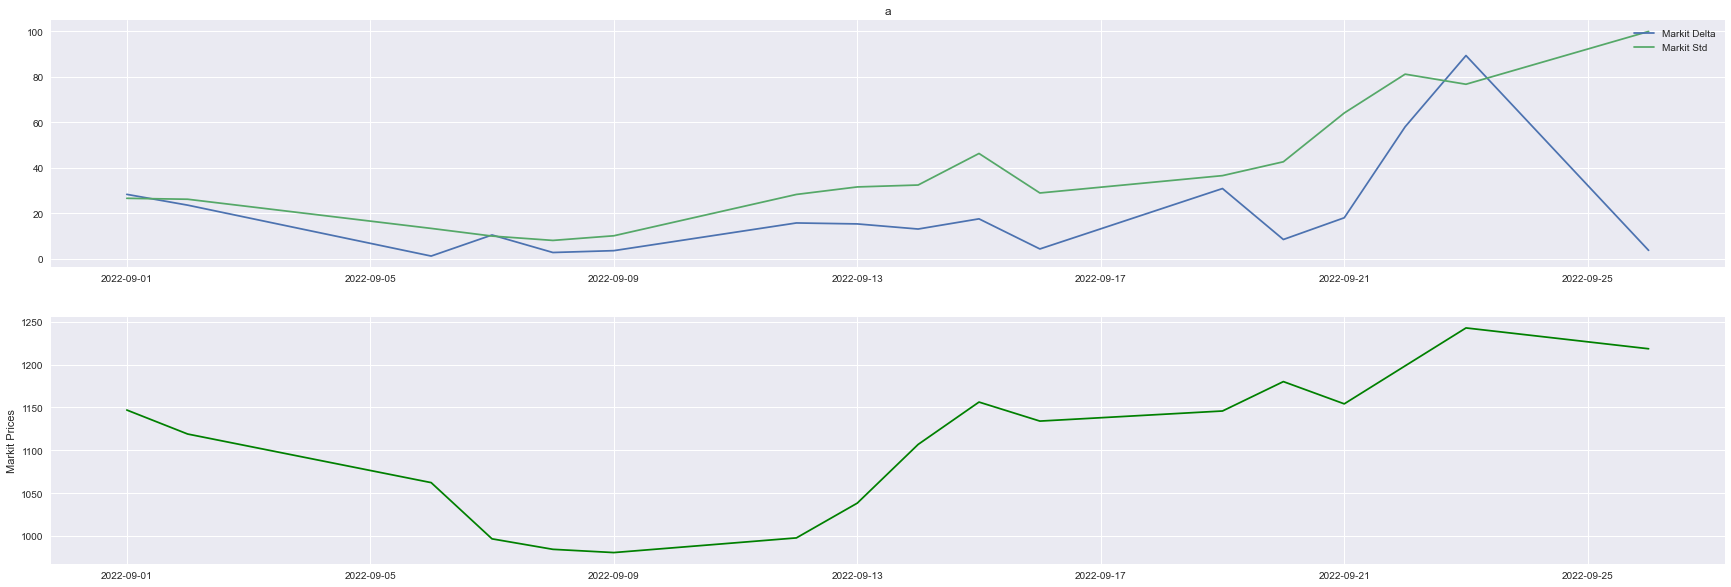

In [227]:
fig,ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.style.use('seaborn')


ax[0].plot(data.index, data["Markit Delta"], label = "Markit Delta")
ax[0].plot(data.index, data["Markit Std"], label = "Markit Std")
ax[0].legend(loc="upper right")
ax[0].set_title("a")

ax[1].plot(data.index, data["Markit"], label = "Markit prices", color = "green")
ax[1].set_ylabel("Markit Prices")

#ax1 = ax[1].twinx()
#ax1.plot(data.index, data["Markit std %"], label = "Markit Std %")
#ax1.set_ylabel("Markit Std %")
#ax1.legend(loc="upper right")

ax[1].title("Markit Delta vs Markit std - Q1 2023 French Bl contract")
plt.legend()
plt.show()


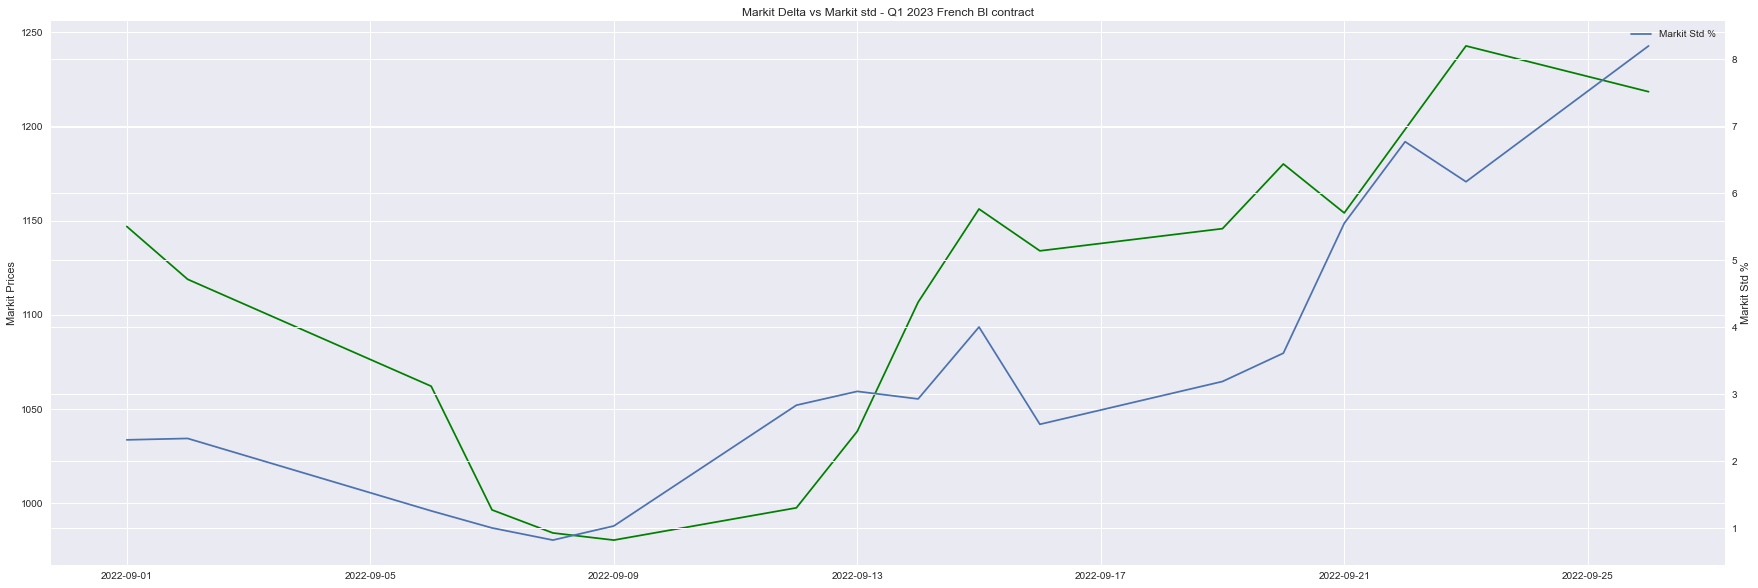

In [192]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
plt.style.use('seaborn')


ax.plot(data.index, data["Markit"], label = "Markit prices", color = "green")
ax.set_ylabel("Markit Prices")

ax1 = ax.twinx()
ax1.plot(data.index, data["Markit std %"], label = "Markit Std %")
ax1.set_ylabel("Markit Std %")
ax1.legend(loc=0)

plt.title("Markit Delta vs Markit std - Q1 2023 French Bl contract")

plt.show()

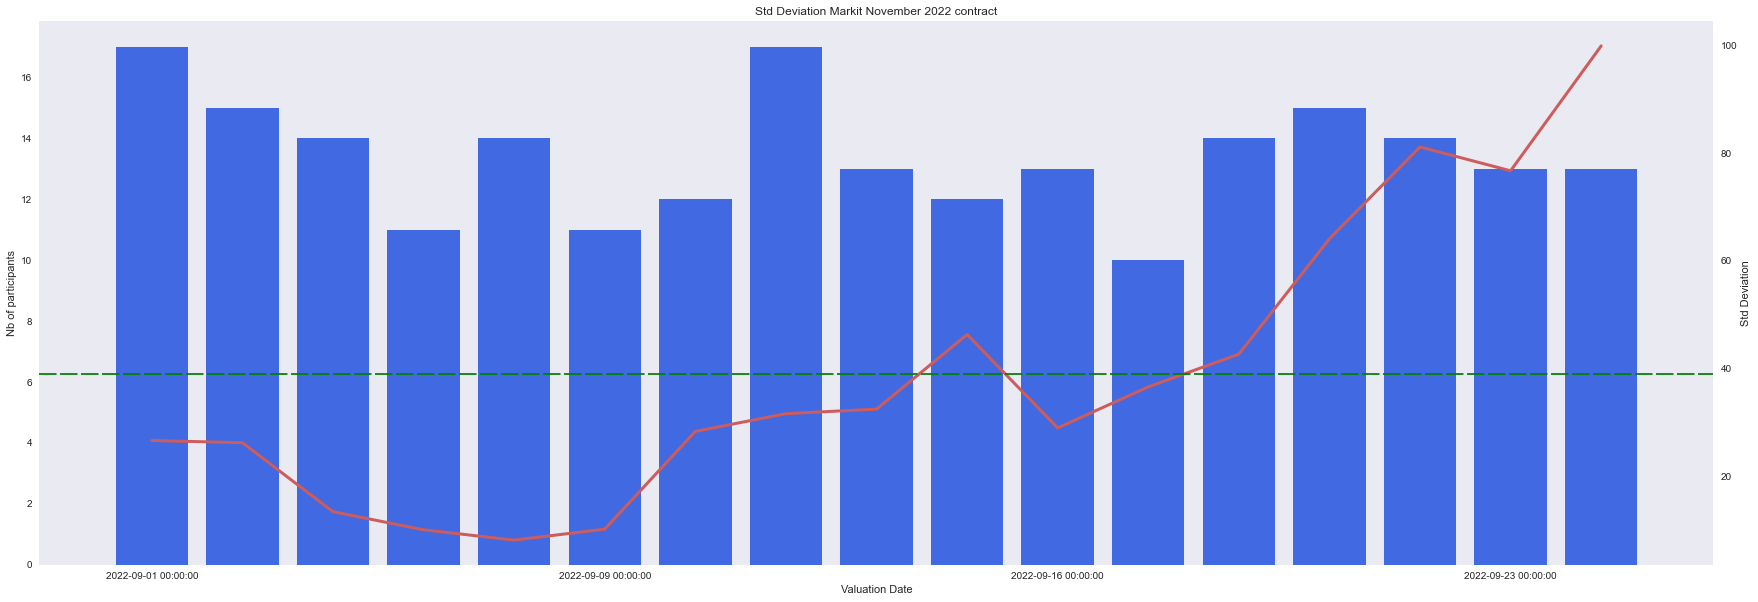

In [ ]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(30)
plt.rcParams["axes.grid"] = False

ax.bar(max_std["ns1:ValuationDate"], max_std["ns1:NumberAcceptedPrice"], color = 'royalblue',  linewidth = 3)
ax.set_xlabel('Valuation Date')
ax.set_ylabel('Nb of participants')

ax2 = ax.twinx()
ax2.plot(max_std["ns1:ValuationDate"], max_std["ns1:StandardDeviationPrice"], color = 'indianred', linewidth = 3, label = "Nb of particioapnts")
ax2.set_xlabel('Valuation Date')
ax2.set_ylabel('Std Deviation')

plt.axhline(y = max_std["ns1:StandardDeviationPrice"].mean() , color = 'g', linestyle=(0,(10,2)))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.title("Std Deviation Markit November 2022 contract");

plt.show()


In [ ]:
os.chdir(r'..\Data')
plt.rcParams["axes.grid"] = True
Data = pd.read_csv(r"Data Mark-It Raw 05.csv")
Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]
France_bl_05 = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Quarter') & (Data['ns1:StartDate'] == '2023-07-01 00:00:00')  ,:]

Data = pd.read_csv(r"Data Mark-It Raw 06.csv")

Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]
France_bl_06 = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Quarter') & (Data['ns1:StartDate'] == '2023-07-01 00:00:00')  ,:]

Data = pd.read_csv(r"Data Mark-It Raw 07.csv")

Data = Data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]
France_bl_07 = Data.loc[(Data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (Data['ns1:Period'] == 'Quarter') & (Data['ns1:StartDate'] == '2023-07-01 00:00:00')  ,:]

#Data = pd.read_csv(r"Data Mark-It Raw 05.csv")

France_bl = pd.concat([France_bl_05, France_bl_06, France_bl_07], ignore_index=True)

ax = plt.figure(figsize = (30, 10), dpi = 650)
plt.plot( France_bl["ns1:ValuationDate"], France_bl["ns1:StandardDeviationPrice"], label = "Std")
plt.axhline(y = France_bl["ns1:StandardDeviationPrice"].mean() , color = 'g', linestyle=(0,(10,2)), label = "Std mean")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.title("Q3 2023 Std Deviation")
plt.xlabel("Assessment Date")
plt.ylabel("Std dev")

#plt.text(44.5, 5,f'std mean = {round(France_bl["ns1:StandardDeviationPrice"].mean(),2)}', size = 11)
plt.legend()


os.chdir("../Pictures")
plt.savefig("Q3 2023 Std Deviation.png")
;

''